Task - 2.6 Building model with deep learning

In [1]:
# Importing Necessary Packages
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
from datetime import datetime  # Import datetime from the datetime module
from pandas import Series, DataFrame
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# data visualization
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import ticker

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\Next Hikes Project_06\train_store_clean_data.csv')

In [3]:
df.head(3)

,Unnamed: 0,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,5,5263,555,1,1,0,1,2015,...,2015-07-31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,1,4,5020,546,1,1,0,1,2015,...,2015-07-30,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,2,1,3,4782,523,1,1,0,1,2015,...,2015-07-29,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [4]:
# Sample a fraction of the dataset (e.g., 50%)
data = df.sample(frac=0.01, random_state=42)  # Adjust the fraction as needed

# Save the sampled data to a new CSV file
data.to_csv('sampled_data.csv', index=False)

In [5]:
train_data = pd.read_csv(r'sampled_data.csv')

In [6]:
train_data.head(3)

,Unnamed: 0,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,76435,84,1,8336,1021,1,0,0,1,2013,...,2013-10-28,a,c,11810.0,8.0,2014.0,0,NaN,NaN,NaN
1,923026,1013,6,2193,232,1,0,0,0,2015,...,2015-05-09,a,a,630.0,2.0,2015.0,1,31.0,2013.0,"Feb,May,Aug,Nov"
2,731180,803,5,5375,459,1,0,0,0,2015,...,2015-02-13,d,a,1760.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"


In [7]:
import logging
import logging.handlers
import os
 

In [8]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
enc = LabelEncoder()
column_list = ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']
try:
    for column in column_list:
        enc.fit(train_data[column])
        train_data[column] = enc.transform(train_data[column])
        logging.info(f"Changing non-numeric to numeric values, successfully")
except Exception as e:
    print(e)
    logging.exception(f"Exception occured while changing non-numeric to numeric values, Exception:{e}")

In [9]:
train_data.head(3)

,Unnamed: 0,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,76435,84,1,8336,1021,1,0,0,1,2013,...,2013-10-28,0,2,11810.0,8.0,2014.0,0,NaN,NaN,3
1,923026,1013,6,2193,232,1,0,0,0,2015,...,2015-05-09,0,0,630.0,2.0,2015.0,1,31.0,2013.0,0
2,731180,803,5,5375,459,1,0,0,0,2015,...,2015-02-13,3,0,1760.0,NaN,NaN,1,10.0,2014.0,2


In [10]:
train_data.drop(['Unnamed: 0','Promo2SinceWeek','Promo2SinceYear','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','CompetitionDistance'],axis=1,inplace=True)

In [11]:
train_data.head(3)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Dates,StoreType,Assortment,Promo2,PromoInterval
0,84,1,8336,1021,1,0,0,1,2013,10,28,2013-10-28,0,2,0,3
1,1013,6,2193,232,1,0,0,0,2015,5,9,2015-05-09,0,0,1,0
2,803,5,5375,459,1,0,0,0,2015,2,13,2015-02-13,3,0,1,2


In [12]:
data = train_data.groupby("Dates").agg({"Sales": "mean"})
data.head(10)

,Sales
Dates,
2013-01-01,0.000000
2013-01-02,5058.416667
2013-01-03,5922.384615
2013-01-04,5097.000000
2013-01-05,6593.761905
2013-01-06,0.000000
2013-01-07,10578.555556
2013-01-08,7865.363636
2013-01-09,6196.428571


Isolate the Rossmann Store Sales dataset into time series data

In [13]:
# Step 1: Isolate the dataset into time series data
train_data['Dates'] = pd.to_datetime(train_data['Dates'])
train_data.set_index('Dates', inplace=True)
ts_data = train_data['Sales']


In [14]:
ts_data

Dates
2013-10-28    8336
2015-05-09    2193
2015-02-13    5375
2013-02-21    3911
2014-12-27    5604
              ... 
2015-03-21    3325
2013-01-29    6758
2013-11-28    6946
2013-12-21    7002
2013-03-30    4911
Name: Sales, Length: 10172, dtype: int64

Check if the Time Series Data is Stationary Correlation between date and sales

In [15]:
# Step 2: Check if the time series data is stationary
def check_stationarity(train_data):
    result = adfuller(train_data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary")

check_stationarity(ts_data)

ADF Statistic: -100.20742788525091
p-value: 0.0
Data is stationary


Depending on your conclusion from 2 above difference your time series data

In [16]:
# Step 3: Difference the time series data if not stationary
if adfuller(ts_data)[1] > 0.05:
    ts_data_diff = ts_data.diff().dropna()
    check_stationarity(ts_data_diff)
else:
    ts_data_diff = ts_data

In [17]:
ts_data_diff

Dates
2013-10-28    8336
2015-05-09    2193
2015-02-13    5375
2013-02-21    3911
2014-12-27    5604
              ... 
2015-03-21    3325
2013-01-29    6758
2013-11-28    6946
2013-12-21    7002
2013-03-30    4911
Name: Sales, Length: 10172, dtype: int64

Check for autocorrelation and partial autocorrelation of your data

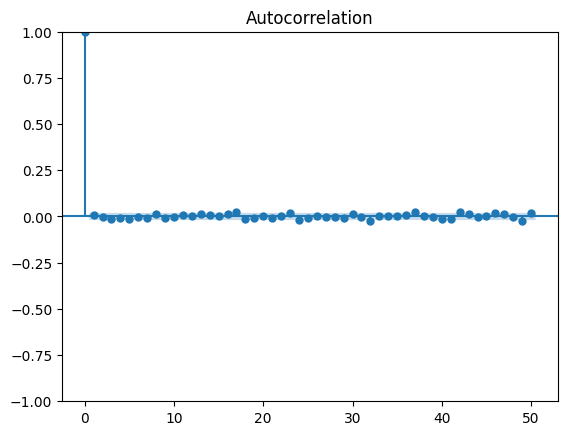

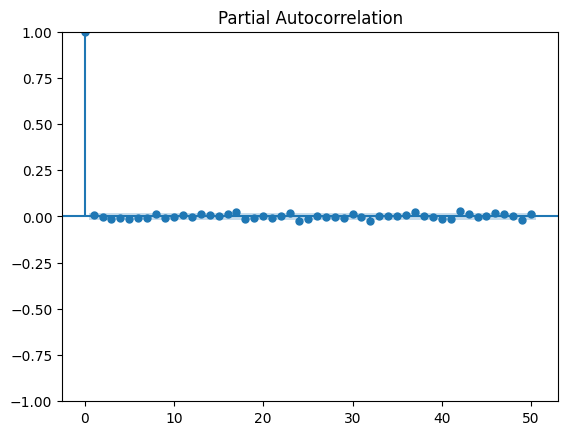

In [18]:
# Step 4: Check for autocorrelation and partial autocorrelation
plot_acf(ts_data_diff, lags=50)
plot_pacf(ts_data_diff, lags=50)
plt.show()


Transform the time series data into supervised learning data by creating a new
y(target) column.

In [19]:
# Step 5: Transform time series data into supervised learning data
def create_supervised_data(data, n_in=1, n_out=1, dropnan=True):
    df = pd.DataFrame(data)
    cols = []
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    agg = pd.concat(cols, axis=1)
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

n_lag = 7  # Number of lag observations as input (for example)
n_out = 1  # Number of future observations to predict
supervised_data = create_supervised_data(ts_data_diff, n_in=n_lag, n_out=n_out)

In [20]:
supervised_data

array([[ 8336.,  2193.,  5375., ...,     0., 14836.,  8917.],
       [ 2193.,  5375.,  3911., ..., 14836.,  8917.,     0.],
       [ 5375.,  3911.,  5604., ...,  8917.,     0.,     0.],
       ...,
       [ 7606.,  7360.,  7922., ...,  3325.,  6758.,  6946.],
       [ 7360.,  7922.,  8306., ...,  6758.,  6946.,  7002.],
       [ 7922.,  8306., 12082., ...,  6946.,  7002.,  4911.]])

Scale the data in the (-1, 1) range

In [21]:
# Step 6: Scale the data in the (-1, 1) range
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(supervised_data)

In [22]:
scaled_data

array([[-0.44083713, -0.85289777, -0.63945533, ..., -1.        ,
        -0.00482962, -0.40186477],
       [-0.85289777, -0.63945533, -0.73765763, ..., -0.00482962,
        -0.40186477, -1.        ],
       [-0.63945533, -0.73765763, -0.62409445, ..., -0.40186477,
        -1.        , -1.        ],
       ...,
       [-0.48980413, -0.50630534, -0.46860746, ..., -0.77696539,
        -0.54668634, -0.53407566],
       [-0.50630534, -0.46860746, -0.44284948, ..., -0.54668634,
        -0.53407566, -0.53031929],
       [-0.46860746, -0.44284948, -0.18956265, ..., -0.53407566,
        -0.53031929, -0.67057955]])

7. Build a LSTM Regression model to predict the next sale

In [23]:
# Step 7: Build LSTM Regression model
def split_data(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]

def build_lstm_model(n_lag, n_features):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_lag, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

n_test = 100  # Number of test samples
n_features = 1  # Number of features (in this case, only the target variable)
train, test = split_data(scaled_data, n_test)

train_X, train_y = train[:, :-n_out], train[:, -n_out]
test_X, test_y = test[:, :-n_out], test[:, -n_out]


In [24]:
train_X

array([[-0.44083713, -0.85289777, -0.63945533, ..., -0.62409445,
        -1.        , -0.00482962],
       [-0.85289777, -0.63945533, -0.73765763, ..., -1.        ,
        -0.00482962, -0.40186477],
       [-0.63945533, -0.73765763, -0.62409445, ..., -0.00482962,
        -0.40186477, -1.        ],
       ...,
       [-0.384022  , -1.        , -0.5468205 , ..., -0.68158036,
        -0.8861685 , -0.38965656],
       [-1.        , -0.5468205 , -0.65562114, ..., -0.8861685 ,
        -0.38965656, -0.58009123],
       [-0.5468205 , -0.65562114, -0.68158036, ..., -0.38965656,
        -0.58009123, -0.40729809]])

In [25]:
train_y

array([-0.40186477, -1.        , -1.        , ..., -0.58009123,
       -0.40729809, -0.61664878])

In [26]:
# Reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_lag, n_features))
test_X = test_X.reshape((test_X.shape[0], n_lag, n_features))

model = build_lstm_model(n_lag, n_features)
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/100


140/140 - 2s - 15ms/step - loss: 0.1187 - val_loss: 0.0511
Epoch 2/100
140/140 - 0s - 3ms/step - loss: 0.0673 - val_loss: 0.0513
Epoch 3/100
140/140 - 0s - 3ms/step - loss: 0.0670 - val_loss: 0.0514
Epoch 4/100
140/140 - 0s - 3ms/step - loss: 0.0670 - val_loss: 0.0515
Epoch 5/100
140/140 - 1s - 4ms/step - loss: 0.0669 - val_loss: 0.0515
Epoch 6/100
140/140 - 0s - 3ms/step - loss: 0.0669 - val_loss: 0.0516
Epoch 7/100
140/140 - 0s - 3ms/step - loss: 0.0669 - val_loss: 0.0516
Epoch 8/100
140/140 - 0s - 3ms/step - loss: 0.0669 - val_loss: 0.0516
Epoch 9/100
140/140 - 0s - 3ms/step - loss: 0.0669 - val_loss: 0.0515
Epoch 10/100
140/140 - 0s - 3ms/step - loss: 0.0669 - val_loss: 0.0515
Epoch 11/100
140/140 - 0s - 3ms/step - loss: 0.0668 - val_loss: 0.0515
Epoch 12/100
140/140 - 0s - 3ms/step - loss: 0.0668 - val_loss: 0.0515
Epoch 13/100
140/140 - 0s - 3ms/step - loss: 0.0668 - val_loss: 0.0515
Epoch 14/100
140/140 - 0s - 3ms/step - loss: 0.0668 - val_loss: 0.0515
Epoch 15/100
140/140 - 0s 

In [27]:
import numpy as np

In [28]:
# Predict next sales using the trained LSTM model
def inverse_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

yhat = model.predict(test_X)
yhat_inverse = inverse_scale(scaler, test_X[-1], yhat[-1])

print("Predicted next sales:", yhat_inverse)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted next sales: 5689.367637634277


In [29]:
adfResult = adfuller(train_data.Sales.values, autolag='AIC')
print(f'ADF Statistic: {adfResult[0]}')
print(f'p-value: {adfResult[1]}')

ADF Statistic: -100.20742788525091
p-value: 0.0


In [30]:
scaler = MinMaxScaler()

try:
    scaler.fit(train_data.Sales.values.reshape([-1, 1]))
    scaled_array = scaler.transform(train_data.Sales.values.reshape(-1, 1))
    train_data['SalesScaled'] = scaled_array
    train_data.tail(10)

    print("Data scaled successfully.")

except Exception as e:
    print(f"Scaling error, {e}")

Data scaled successfully.


Differencing the Time Series

In [31]:
# Create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

salesScaledDiff = difference(train_data.SalesScaled.values)
salesScaledDiff

0       -0.206030
1        0.106721
2       -0.049101
3        0.056782
4       -0.187953
           ...   
10166   -0.293701
10167    0.115140
10168    0.006305
10169    0.001878
10170   -0.070130
Length: 10171, dtype: float64

Making the Data ready for Modeling

In [32]:
SIZE = len(train_data.SalesScaled)
WINDOW_SIZE = 48
BATCH_SIZE = SIZE - WINDOW_SIZE * 2
EPOCHS = 100


In [33]:
DateTrain = train_data.index.values[0:BATCH_SIZE]
DateValid = train_data.index.values[BATCH_SIZE:]
XTrain = train_data.SalesScaled.values[0:BATCH_SIZE].astype('float32')
XValid = train_data.SalesScaled.values[BATCH_SIZE:].astype('float32')

# Obtain shapes for vectors of size (,1) for dates series

DateTrain = np.reshape(DateTrain, (-1, 1))
DateValid = np.reshape(DateValid, (-1, 1))

print("Shape of the training set date series: ", DateTrain.shape)
print("Shape of the validation set date series: ", DateValid.shape)
print()
print("Shape of the training set logarithm of sales series: ", XTrain.shape)
print("Shape of the validation set logarithm of sales series in a stateless LSTM: ", XValid.shape)

Shape of the training set date series:  (10076, 1)
Shape of the validation set date series:  (96, 1)

Shape of the training set logarithm of sales series:  (10076,)
Shape of the validation set logarithm of sales series in a stateless LSTM:  (96,)


In [34]:
tf.random.set_seed(1234)
# add extra dimension
series = tf.expand_dims(XTrain, axis=-1)
series.shape

TensorShape([10076, 1])

In [35]:
import tensorflow as tf

# Assuming 'series' is your input data (e.g., a list or a NumPy array)
series = [1, 2, 3, 4, 5]

# Create a dataset from tensor slices
dataset = tf.data.Dataset.from_tensor_slices(series)
dataset

# Now you can use 'dataset' for further operations


<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [36]:
# takes a window_size + 1 chunk from the slices
dataset = dataset.window(WINDOW_SIZE + 1, shift=1, drop_remainder=True)

In [37]:
datasetEx = tf.data.Dataset.from_tensor_slices(tf.range(10))
datasetEx = datasetEx.window(5, shift=1, drop_remainder=True)
for window in datasetEx:
    print([elem.numpy() for elem in window])

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]


In [38]:
def windowed_dataset(series, window_size=WINDOW_SIZE, batch_size=BATCH_SIZE):
  series = tf.expand_dims(series, axis=-1)
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [39]:
DatasetTrain = windowed_dataset(XTrain)
DatasetVal = windowed_dataset(XValid)

In [40]:
train_size = int(len(train_data) * 0.70)
test_size = len(train_data) - train_size
train, test = train_data.iloc[0:train_size], train_data.iloc[train_size:len(train_data)]
print(train.shape, test.shape)

(7120, 16) (3052, 16)


Model Building

In [41]:
model = Sequential()
model.add(LSTM(8, input_shape=[None, 1], return_sequences=True))
model.add(LSTM(4, input_shape=[None, 1]))
model.add(Dense(1))
model.compile(loss="huber_loss", optimizer='adam')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, None, 8)        │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 4)              │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533 (2.08 KB)

 Trainable params: 533 (2.08 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
import mlflow

In [43]:
import mlflow
import tensorflow as tf
from tensorflow.keras.losses import Huber

# Set your experiment
mlflow.set_experiment("LSTM")

# Enable autologging for TensorFlow
mlflow.tensorflow.autolog()

# Assuming you have defined your model and datasets before this point
# Compile your model with Huber loss
model.compile(optimizer='adam', loss=Huber(), metrics=['accuracy'])

# Train your model
history = model.fit(DatasetTrain, epochs=EPOCHS, validation_data=DatasetVal, verbose=1)


2024/04/10 01:10:14 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


2024/04/10 01:10:14 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e9c8fab176df49fab93e94fbf1943b1e', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2024/04/10 01:10:16 INFO mlflow.types.utils: MLflow 2.9.0 introduces model signature with new data types for lists and dictionaries. For input such as Dict[str, Union[scalars, List, Dict]], we infer dictionary values types as `List -> Array` and `Dict -> Object`. 
2024/04/10 01:10:16 INFO mlflow.types.utils: MLflow 2.9.0 introduces model signature with new data types for lists and dictionaries. For input such as Dict[str, Union[scalars, List, Dict]], we infer dictionary values types as `List -> Array` and `Dict -> Object`. 


Epoch 1/100
      1/Unknown 5s 5s/step - accuracy: 0.1727 - loss: 0.0256

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.1727 - loss: 0.0192 - val_accuracy: 0.1458 - val_loss: 0.0113
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 988ms/step - accuracy: 0.1727 - loss: 0.0235

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0176 - val_accuracy: 0.1458 - val_loss: 0.0104
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0218

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0163 - val_accuracy: 0.1458 - val_loss: 0.0096
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 949ms/step - accuracy: 0.1727 - loss: 0.0202

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0151 - val_accuracy: 0.1458 - val_loss: 0.0088
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0186

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0140 - val_accuracy: 0.1458 - val_loss: 0.0080
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0172

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0129 - val_accuracy: 0.1458 - val_loss: 0.0073
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 970ms/step - accuracy: 0.1727 - loss: 0.0157

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0118 - val_accuracy: 0.1458 - val_loss: 0.0066
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 954ms/step - accuracy: 0.1727 - loss: 0.0144

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0108 - val_accuracy: 0.1458 - val_loss: 0.0060
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0131

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0098 - val_accuracy: 0.1458 - val_loss: 0.0054
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0119

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0090 - val_accuracy: 0.1458 - val_loss: 0.0048
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0109

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0082 - val_accuracy: 0.1458 - val_loss: 0.0044
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 942ms/step - accuracy: 0.1727 - loss: 0.0100

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0075 - val_accuracy: 0.1458 - val_loss: 0.0040
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0093

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0070 - val_accuracy: 0.1458 - val_loss: 0.0037
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0088

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0066 - val_accuracy: 0.1458 - val_loss: 0.0035
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 935ms/step - accuracy: 0.1727 - loss: 0.0085

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0064 - val_accuracy: 0.1458 - val_loss: 0.0035
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0035
Epoch 17/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0035
Epoch 18/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0065 - val_accuracy: 0.1458 - val_loss: 0.0037
Epoch 19/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 995ms/step - accuracy: 0.1727 - loss: 0.0067 - val_accuracy: 0.1458 - val_loss: 0.0038
Epoch 20/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 985ms/step - accuracy: 0.1727 - loss: 0.0069 - val_accuracy: 0.1458 - val_loss: 0.0039
Epoch 21/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0071 - val_accuracy: 0.1458 - val_loss: 0.0040
Epoch 22/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 965ms/step - accuracy: 0.1727 - loss: 0.0072 - val_accuracy: 0.1458 - val_loss: 0.0040
Epoc

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0072 - val_accuracy: 0.1458 - val_loss: 0.0040
Epoch 24/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 910ms/step - accuracy: 0.1727 - loss: 0.0096

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0072 - val_accuracy: 0.1458 - val_loss: 0.0039
Epoch 25/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 923ms/step - accuracy: 0.1727 - loss: 0.0095

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0071 - val_accuracy: 0.1458 - val_loss: 0.0038
Epoch 26/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0093

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0070 - val_accuracy: 0.1458 - val_loss: 0.0037
Epoch 27/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 939ms/step - accuracy: 0.1727 - loss: 0.0091

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0068 - val_accuracy: 0.1458 - val_loss: 0.0037
Epoch 28/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 941ms/step - accuracy: 0.1727 - loss: 0.0089

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0066 - val_accuracy: 0.1458 - val_loss: 0.0036
Epoch 29/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 931ms/step - accuracy: 0.1727 - loss: 0.0087

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0065 - val_accuracy: 0.1458 - val_loss: 0.0035
Epoch 30/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0085

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0064 - val_accuracy: 0.1458 - val_loss: 0.0035
Epoch 31/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0084

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0035
Epoch 32/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 960ms/step - accuracy: 0.1727 - loss: 0.0084

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 33/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0035
Epoch 34/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0035
Epoch 35/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0035
Epoch 36/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0035
Epoch 37/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 994ms/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0035
Epoch 38/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0064 - val_accuracy: 0.1458 - val_loss: 0.0036
Epoch 39/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0064 - val_accuracy: 0.1458 - val_loss: 0.0036
Epoch 40/1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0064 - val_accuracy: 0.1458 - val_loss: 0.0036
Epoch 42/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 949ms/step - accuracy: 0.1727 - loss: 0.0085

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0064 - val_accuracy: 0.1458 - val_loss: 0.0036
Epoch 43/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0085

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0064 - val_accuracy: 0.1458 - val_loss: 0.0035
Epoch 44/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0085

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0064 - val_accuracy: 0.1458 - val_loss: 0.0035
Epoch 45/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 937ms/step - accuracy: 0.1727 - loss: 0.0085

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0064 - val_accuracy: 0.1458 - val_loss: 0.0035
Epoch 46/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0084

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0035
Epoch 47/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 953ms/step - accuracy: 0.1727 - loss: 0.0084

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0035
Epoch 48/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 950ms/step - accuracy: 0.1727 - loss: 0.0084

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0035
Epoch 49/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 906ms/step - accuracy: 0.1727 - loss: 0.0084

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0035
Epoch 50/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 946ms/step - accuracy: 0.1727 - loss: 0.0084

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0035
Epoch 51/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0084

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 52/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 982ms/step - accuracy: 0.1727 - loss: 0.0083

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 53/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 933ms/step - accuracy: 0.1727 - loss: 0.0083

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 54/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 55/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 56/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 57/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 58/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 59/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0084

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 60/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 941ms/step - accuracy: 0.1727 - loss: 0.0084

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 61/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 995ms/step - accuracy: 0.1727 - loss: 0.0084

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 62/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0084

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 63/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 918ms/step - accuracy: 0.1727 - loss: 0.0084

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 64/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 963ms/step - accuracy: 0.1727 - loss: 0.0084

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 65/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 944ms/step - accuracy: 0.1727 - loss: 0.0084

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 66/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 67/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 68/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 69/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 70/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 71/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 72/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 73/1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 77/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 949ms/step - accuracy: 0.1727 - loss: 0.0084

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 78/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0083

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 79/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0083

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 80/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 965ms/step - accuracy: 0.1727 - loss: 0.0083

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 81/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 940ms/step - accuracy: 0.1727 - loss: 0.0083

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 82/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 932ms/step - accuracy: 0.1727 - loss: 0.0083

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 83/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 983ms/step - accuracy: 0.1727 - loss: 0.0083

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 84/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0083

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 85/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 933ms/step - accuracy: 0.1727 - loss: 0.0083

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 86/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 956ms/step - accuracy: 0.1727 - loss: 0.0083

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 87/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0083

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 88/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 936ms/step - accuracy: 0.1727 - loss: 0.0083

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 89/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 944ms/step - accuracy: 0.1727 - loss: 0.0083

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 90/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0083

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 91/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0083

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 92/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1727 - loss: 0.0083

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 93/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 934ms/step - accuracy: 0.1727 - loss: 0.0083

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 94/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 95/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 96/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 97/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 989ms/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 98/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 975ms/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 99/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034
Epoch 100/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step - accuracy: 0.1727 - loss: 0.0063 - val_accuracy: 0.1458 - val_loss: 0.0034


In [44]:
loss = model.evaluate(DatasetVal, verbose=1)
t_loss = model.evaluate(DatasetTrain, verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1458 - loss: 0.0052


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1727 - loss: 0.0063


In [45]:
# Assuming t_loss and loss are lists containing multiple values
# You need to compute their mean or choose a specific value to print

# Example: Compute mean of the list
t_loss_mean = sum(t_loss) / len(t_loss)
loss_mean = sum(loss) / len(loss)

# Now you can print the mean values
print("Training loss = %f" % (t_loss_mean))
print("Validation loss = %f" % (loss_mean))


Training loss = 0.088444
Validation loss = 0.074636


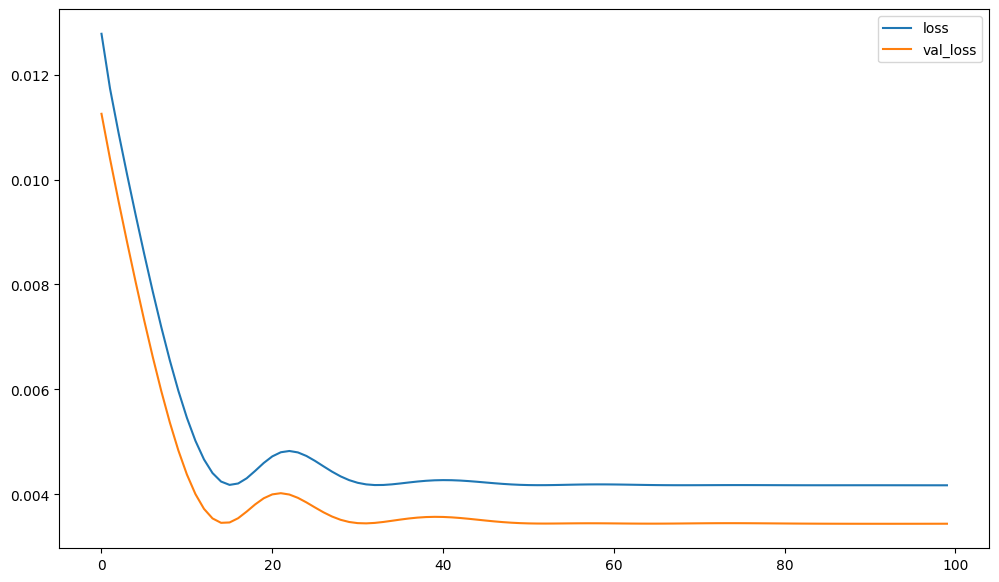

In [46]:
fig = plt.figure(figsize=(12, 7))
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

In [47]:
from time import gmtime, strftime

time = strftime("%Y-%m-%d", gmtime())
time

'2024-04-09'

In [48]:
import time

# Assuming 'model' is your Keras model
# Save the model to disk
model.save('lstm_model.h5')

Model Prediction

In [49]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True) 
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(SIZE).prefetch(1)
    forecast = model.predict(ds)
    return forecast

Forecast = model_forecast(model, data.Sales.values[:, np.newaxis], WINDOW_SIZE)

Results = Forecast[BATCH_SIZE-WINDOW_SIZE:-1]
if Results.shape[0] > 0:
    Results1 = scaler.inverse_transform(Results.reshape(-1, 1))
    # Proceed with further processing
else:
    print("Results array is empty. Unable to perform inverse transformation.")
XValid1 = scaler.inverse_transform(XValid.reshape(-1,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
Results array is empty. Unable to perform inverse transformation.


In [50]:
Results

array([], shape=(0, 1), dtype=float32)

In [51]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [52]:
# check for the statinarity of the data
def test_stationarity(timeseries):
  # Perform the dicky fuller test
  result = adfuller(timeseries, autolag='AIC')

  # print the tesrt statitistics
  print('ADF statistics: ', result[0])
  print("p-values:", result[1])
  print('Critical Values: ', result[4])

  # Check for the significance
  if result[1] <= 0.05:
    print("Reject the null hypothesis - Data is stationary")
  else:
    print("Fail to reject the null hypothesis - Data is non stationary")

#Check for the stationarity if the time series
test_stationarity(train_data['Sales'])

ADF statistics:  -100.20742788525091
p-values: 0.0
Critical Values:  {'1%': -3.430993098136503, '5%': -2.861824211647688, '10%': -2.566921280717468}
Reject the null hypothesis - Data is stationary


In [53]:
# Differencing to make the time series stationary
data_diff = train_data['Sales'].diff().dropna()

In [54]:
test_stationarity(data_diff)

ADF statistics:  -28.631696060819753
p-values: 0.0
Critical Values:  {'1%': -3.430995510445205, '5%': -2.8618252776307758, '10%': -2.566921848141031}
Reject the null hypothesis - Data is stationary


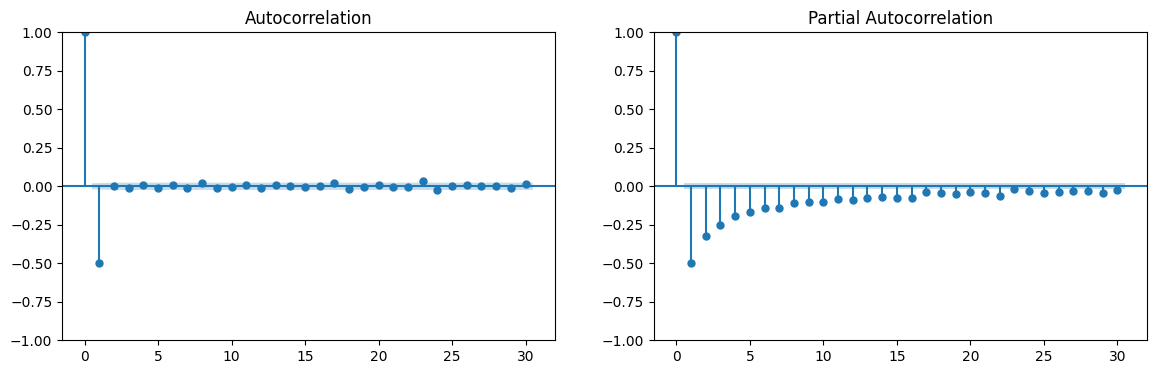

In [55]:

# Plot the Autocorrelation Function (ACF) and the Partial Autocorrelation Function (PACF)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14, 4))

# Plot the ACF
plot_acf(data_diff, lags=30, ax=ax1)

# Plot the pacf
plot_pacf(data_diff, lags=30, ax=ax2)

plt.show()

In [56]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Assuming 'train_data' is a DataFrame with a column named 'Sales'

# Fit the ARIMA model
p, d, q = 1, 1, 2
model = ARIMA(train_data['Sales'], order=(p, d, q))
results = model.fit()

# Continue with your analysis or forecasting using 'results'


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monoto

In [57]:
# Display the model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                10172
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -98390.671
Date:                Wed, 10 Apr 2024   AIC                         196789.343
Time:                        01:12:39   BIC                         196818.252
Sample:                             0   HQIC                        196799.120
                              - 10172                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9998      0.005   -182.819      0.000      -1.011      -0.989
ma.L1         -0.0002      0.012     -0.013      0.990      -0.023       0.023
ma.L2         -0.9998      0.012    -85.012      0.0

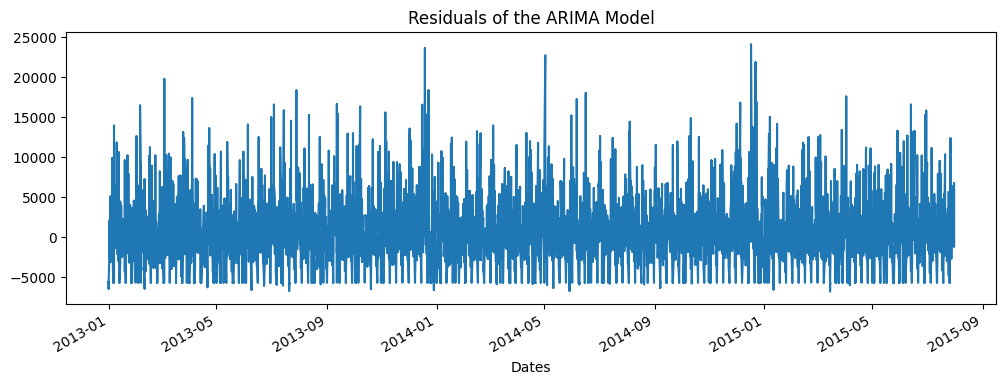

In [58]:
# plot the residuals
residuals = train_data['Sales'] - results.fittedvalues
residuals.plot(figsize=(12, 4))
plt.title("Residuals of the ARIMA Model")
plt.show()

In [59]:
# Finnaly let us make the prediction
n_forecast = 3 # Number of the periods to forecast
forecast, stderr, conf_int = results.forecast(steps = n_forecast)

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


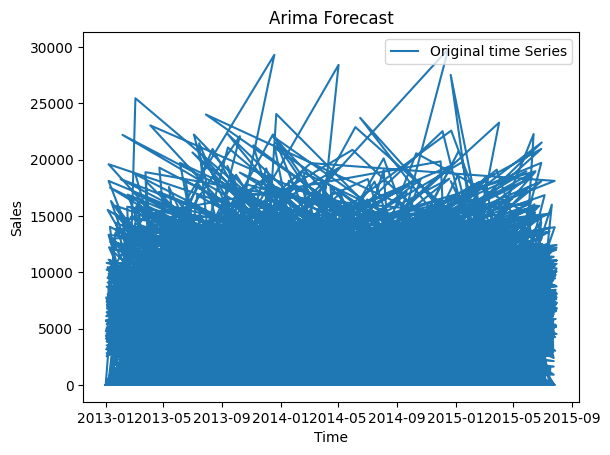

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'forecast' is your forecasted values and 'conf_int' is your confidence intervals

# Plot the original time series and forecasted Values
plt.plot(train_data['Sales'], label = "Original time Series")
# plt.plot(np.arange(len(data), len(data) + n_forecast), forecast, label = 'Forecast', color = 'red')
plt.title("Arima Forecast")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()
